# Определение перспективного тарифа для телеком компании

**Цель**: Определить выгодный тарифный план для корректировки рекламного бюджета.

**Выборка**. Данные 500 пользователей тарифных планов «Смарт» и «Ультра»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

**Примечание**: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

In [3]:
# Необходимые библиотеки для исследования 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format

In [4]:
# Загрузка данных

df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

## Подготовка данных для анализа

In [5]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.000,1000
1,1000_1,2018-08-17,0.000,1000
2,1000_2,2018-06-11,2.850,1000
3,1000_3,2018-09-21,13.800,1000
4,1000_4,2018-12-15,5.180,1000


In [6]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
df_calls.duplicated().sum()

0

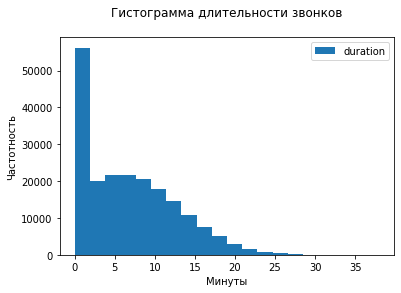

In [8]:
df_calls.plot(kind='hist', y='duration', bins=20)
plt.title('Гистограмма длительности звонков'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')

plt.show()

In [9]:
# Сколько звонков с нулевой длительностью 

df_calls['duration'].value_counts().sort_index()[0]

39613

**Промежуточный вывод**

- Пропусков и дубликатов в данных нет
- Почти у 20% звонков длительность составляет 0.0 минут. Такие звонки необходимо округлить в бОльшую сторону для корректного подсчета выручки.
- Необходимо изменить тип данных длительности звонков (на целочисленный) и дату звонков для упрощения расчетов.

In [10]:
# Заменяем значения с 0 на 1 минуту

df_calls.loc[df_calls['duration'] == 0, 'duration'] = 1

In [11]:
# Округляем длительность звонков и меняем тип данных на целочисленный

df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')

In [12]:
# Перевод даты из объектного типа в тип datetime64

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [13]:
# Добавляем столбец с категорией месяца: Январь - 1, Февраль - 2, ..., Декабрь - 12

df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month

In [14]:
df_calls['call_date'].dt.month

0          7
1          8
2          6
3          9
4         12
          ..
202602    12
202603    10
202604    11
202605    10
202606    12
Name: call_date, Length: 202607, dtype: int64

In [15]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.950,2018-11-25,1000
1,1,1000_1,1052.810,2018-09-07,1000
2,2,1000_2,1197.260,2018-06-25,1000
3,3,1000_3,550.270,2018-08-22,1000
4,4,1000_4,302.560,2018-09-24,1000


In [16]:
df_internet.duplicated().sum()

0

In [17]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Промежуточный вывод**

- Пропусков и дубликатов в данных нет
- Необходимо округлить объем интернет-трафика для правильного расчета выручки, т.к. тарификация происходит за полный мегабай.
- Необходимо изменить тип данных объема интернет-трафика (на целочисленный) и дату интернет-соединения для упрощения расчетов.

In [18]:
# Перевод даты из объектного типа в тип datetime64

df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

# Округляем объем интернет-трацика и меняем тип данных на целочисленный

df_internet['mb_used'] = np.ceil(df_internet['mb_used']).astype('int')

# Добавляем столбец с категорией месяца: Январь - 1, Февраль - 2, ..., Декабрь - 12

df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

In [19]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 6.8+ MB


In [20]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [21]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [22]:
df_messages.duplicated().sum()

0

**Промежуточные выводы**

- Пропусков и дубликатов в данных нет
- Необходимо изменить тип данных даты отправки сообщения для упрощения расчетов

In [23]:
# Перевод даты из объектного типа в тип datetime64

df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

# Добавляем столбец с категорией месяца: Январь - 1, Февраль - 2, ..., Декабрь - 12

df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

In [24]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


In [25]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [26]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Промежуточные выводы**

- 38 абонентов отказались от тарифа.
- Необходимо изменить типы данных дат для упрощения расчетов
- Добавим информацию о длительности пользования тарифами.

In [27]:
# Перевод даты из объектного типа в тип datetime64

df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

# Добавляем столбец с категорией месяца: Январь - 1, Февраль - 2, ..., Декабрь - 12

df_users['month_stop'] = pd.DatetimeIndex(df_users['churn_date']).month
df_users['month_start'] = pd.DatetimeIndex(df_users['reg_date']).month

df_users['year_stop'] = pd.DatetimeIndex(df_users['churn_date']).year
df_users['year_start'] = pd.DatetimeIndex(df_users['reg_date']).year

# Расчет длительности пользования тарифом

df_users['day_duration_of_use'] = df_users['churn_date'] - df_users['reg_date']

# Дополнительные вычисления данных


**Количество сделанных звонков и израсходованных минут разговора по месяцам**

In [28]:
calls = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
calls.columns = ['user_id', 'month', 'calls_count', 'calls_sum']
calls.head()

,user_id,month,calls_count,calls_sum
0,1000,5,22,164
1,1000,6,43,187
2,1000,7,47,346
3,1000,8,52,418
4,1000,9,58,478


**Количество отправленных сообщений по месяцам**

In [29]:
messages = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
messages.columns = ['user_id', 'month', 'messages_count']
messages.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


**Объем израсходованного интернет-трафика по месяцам**

In [30]:
internet = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
internet.columns = ['user_id', 'month', 'mb_sum_internet']
internet.head()

,user_id,month,mb_sum_internet
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


In [31]:
# т.к. стоимость интернет-трафика исчисляется в гигабайтах, то необходимо рассчитать гигабайты и округлить их в большую сторону

internet['gb_sum_internet'] = np.ceil(internet['mb_sum_internet'] / 1024)

**Объединение таблиц для вычисления выручки**


In [32]:
# Перед объединением таблиц необходимо проверить количество ID клиентов в каждой таблице для выбора правильного метода соединения

print('Всего информация представлена по', len(df_users['user_id'].unique()), 'абонентам.')
print('Информация по сообщениям представлена у', len(df_messages['user_id'].unique()), 'абонентов.')
print('Информация по звонкам представлена у', len(df_calls['user_id'].unique()), 'абонентов.')
print('Информация по объему интернет-трафика представлена у', len(df_internet['user_id'].unique()), 'абонентов.')


Всего информация представлена по 500 абонентам.
Информация по сообщениям представлена у 426 абонентов.
Информация по звонкам представлена у 492 абонентов.
Информация по объему интернет-трафика представлена у 497 абонентов.


In [33]:
# Объединение информации по звонкам и сообщениям 

revenue = calls.merge(messages, on=['user_id', 'month'], how='outer')

In [34]:
# calls - UserId
# messages - user_id

# revenue = calls.merge(messages, left_index=['UserId', 'month'], right_index=['user_id', 'month'], how='outer')

In [35]:
revenue

,user_id,month,calls_count,calls_sum,messages_count
0,1000,5,22.000,164.000,22.000
1,1000,6,43.000,187.000,60.000
2,1000,7,47.000,346.000,75.000
3,1000,8,52.000,418.000,81.000
4,1000,9,58.000,478.000,57.000
...,...,...,...,...,...
3208,1489,8,nan,nan,17.000
3209,1489,9,nan,nan,32.000
3210,1489,10,nan,nan,21.000
3211,1489,11,nan,nan,20.000


In [36]:
# Проверка объединения данных: множество из всех элементов уникальных id пользователей в таблице с информацией, 
# не принадлежащие ни одному id из таблицы со звонками.

len(set(messages['user_id'].unique()) - set(calls['user_id'].unique()))

# Если объединение таблиц прошло верно, то в новой таблице будет отображена информация по 498 абонентам.

6

In [37]:
set(messages['user_id'].unique()) - set(calls['user_id'].unique())

{1091, 1106, 1231, 1328, 1473, 1489}

In [38]:
revenue.head()

,user_id,month,calls_count,calls_sum,messages_count
0,1000,5,22.000,164.000,22.000
1,1000,6,43.000,187.000,60.000
2,1000,7,47.000,346.000,75.000
3,1000,8,52.000,418.000,81.000
4,1000,9,58.000,478.000,57.000


In [39]:
# Всего строк после объединения

len(revenue['user_id'].unique())

498

Объединение таблиц прошло верно.

In [40]:
# Присоединение данных пользователей об объеме интернет-трафике

revenue = revenue.merge(internet, on=['user_id', 'month'], how='outer')

In [41]:
revenue.head()

,user_id,month,calls_count,calls_sum,messages_count,mb_sum_internet,gb_sum_internet
0,1000,5,22.000,164.000,22.000,2256.000,3.000
1,1000,6,43.000,187.000,60.000,23257.000,23.000
2,1000,7,47.000,346.000,75.000,14016.000,14.000
3,1000,8,52.000,418.000,81.000,14070.000,14.000
4,1000,9,58.000,478.000,57.000,14581.000,15.000


In [42]:
# Проверка объединения данных

len(set(internet['user_id'].unique()) - set(revenue['user_id'].unique()))

0

In [43]:
len(revenue['user_id'].unique())

498

Получается, что информация представлена не по всем пятиста пользователям. 

In [44]:
# Id пользователей, по которым пропущена информация

set(df_users['user_id'].unique()) - set(revenue['user_id'].unique())

{1128, 1371}

In [45]:
# Проверка: 2 абонента, по которым пропущена информация о пользовании услуг оператора, больше не пользуются услугами тарифа

df_users[(df_users['churn_date'].notnull()) & ((df_users['user_id'] == 1128) | (df_users['user_id'] == 1371))]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_stop,month_start,year_stop,year_start,day_duration_of_use
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12.000,12,2018.000,2018,8 days
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12.000,12,2018.000,2018,5 days


In [46]:
# Проверка: есть еще пользователи, которые использовали тариф меньше 1 месяца

df_users[df_users['day_duration_of_use'] < '30 days']

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_stop,month_start,year_stop,year_start,day_duration_of_use
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart,12.000,11,2018.000,2018,23 days
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12.000,12,2018.000,2018,8 days
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12.000,12,2018.000,2018,5 days


**Промежуточный вывод**

Данные по двум абонентам отсутствуют из-за того, что они подключились и отключились к тарифу **в течение одного месяца**. 

In [47]:
# Добавляем необходимый столбец с данными для расчета выручки

revenue = revenue.merge(df_users[['user_id', 'tariff']], on='user_id', how='left')
revenue.head()

,user_id,month,calls_count,calls_sum,messages_count,mb_sum_internet,gb_sum_internet,tariff
0,1000,5,22.000,164.000,22.000,2256.000,3.000,ultra
1,1000,6,43.000,187.000,60.000,23257.000,23.000,ultra
2,1000,7,47.000,346.000,75.000,14016.000,14.000,ultra
3,1000,8,52.000,418.000,81.000,14070.000,14.000,ultra
4,1000,9,58.000,478.000,57.000,14581.000,15.000,ultra


In [48]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [49]:
# Расчет ежемясчного объема интернет-трафика в мегабайтах

df_tariffs['gb_per_month_included'] = df_tariffs['mb_per_month_included'] / 1024

In [50]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.000
1,1000,30720,3000,1950,150,1,1,ultra,30.000


## Расчет помесячной выручки с каждого пользователя

In [51]:
def monthly_revenue(row):
    """
    Функция по расчету ежемесячной выручки. Опции по тарифам соотносятся с информацией из таблицы df_tariffs.
    """
    money = 0
    
    tariff = row['tariff']
    calls_sum = row['calls_sum']
    messages_count = row['messages_count']
    gb_sum_internet = row['gb_sum_internet']
    
    # Считается разница между потраченными минутами, трафиком, смс и объемом услуг, включенных в абонентскую плату
    difference_calls = calls_sum - int(df_tariffs[df_tariffs['tariff_name'] == tariff]['minutes_included'])
    difference_messages = messages_count - int(df_tariffs[df_tariffs['tariff_name'] == tariff]['messages_included'])
    difference_internet = gb_sum_internet - int(df_tariffs[df_tariffs['tariff_name'] == tariff]['gb_per_month_included'])
    
    # Если пользователь вышел за пределы лимитов, обозначенных в абонентской плате, то рассчитывается дополнительная оплата
    if (difference_calls > 0):
        money += difference_calls * int(df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_minute'])
    if difference_messages > 0:
        money += difference_messages * int(df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_message'])
    if difference_internet > 0:
        money += difference_internet * int(df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_gb'])
    
    # Добавление ежемесячной абонентской платы
    money += int(df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_monthly_fee'])
    
    return money
                                                
                                                
                                                

In [52]:
# Вычисление ежемесячной выручки

revenue['monthly_revenue'] = revenue.apply(monthly_revenue, axis=1)
revenue['monthly_revenue'] = revenue['monthly_revenue'].astype('int')

## Исследование данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

**Анализ длительности разговоров**

In [53]:
# Средняя длительность телефонных разговоров

revenue.pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='mean').T.describe()

tariff,smart,ultra
count,12.000,12.000
mean,398.243,525.069
std,74.804,87.055
min,209.647,304.667
25%,393.053,499.264
50%,414.242,547.205
75%,440.289,577.861
max,492.881,631.858


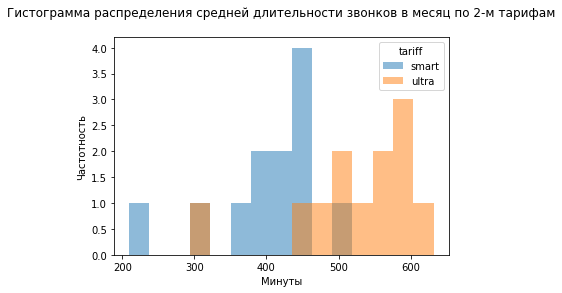

In [54]:
(revenue
 .pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='mean')
 .T
 .plot(kind='hist', alpha=0.5, bins=15)
)
plt.title('Гистограмма распределения средней длительности звонков в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')

plt.show()

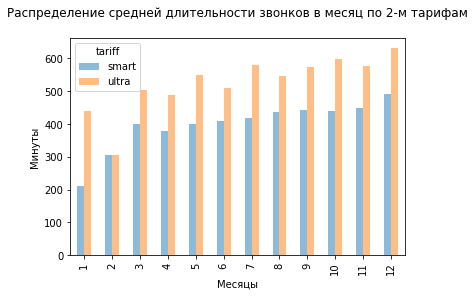

In [55]:
(revenue
 .pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='mean')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Распределение средней длительности звонков в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Месяцы')
plt.ylabel('Минуты')

plt.show()

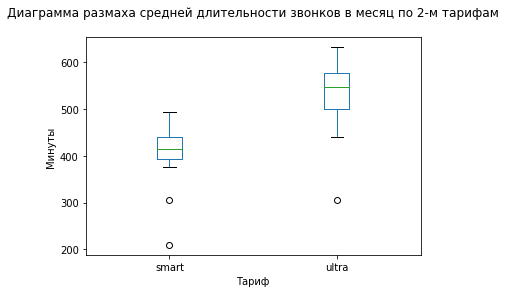

In [56]:
(revenue
 .pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='mean')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха средней длительности звонков в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Минуты')

plt.show()

**Промежуточный вывод**

Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.  

In [57]:
# Стандартное отклонение длительности телефонных разговоров

revenue.pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='std').T.describe()

tariff,smart,ultra
count,12.000,12.000
mean,186.871,305.520
std,11.147,23.189
min,158.869,263.332
25%,183.282,294.997
50%,189.956,304.428
75%,192.080,320.314
max,202.121,342.200


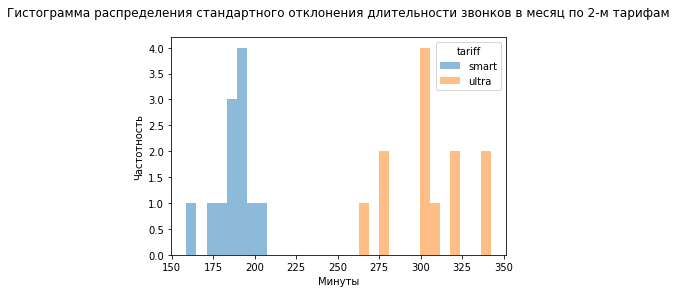

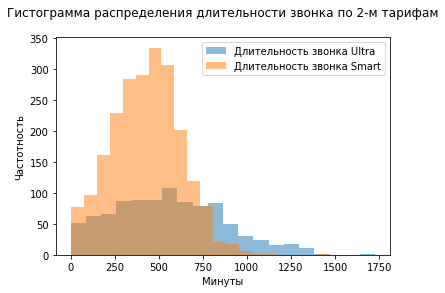

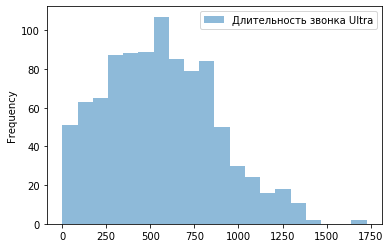

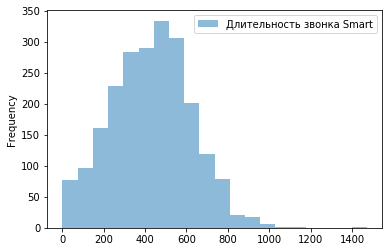

,mean,median
,calls_sum,calls_sum
tariff,,
smart,430.610,435.000
ultra,560.114,544.000


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_stop,month_start,year_stop,year_start,day_duration_of_use
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,nan,5,nan,2018,NaT
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,nan,11,nan,2018,NaT
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,nan,6,nan,2018,NaT
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,nan,8,nan,2018,NaT
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,nan,5,nan,2018,NaT


In [58]:
(revenue.pivot_table(index='tariff', columns = 'month', values='calls_sum', aggfunc='std')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения стандартного отклонения длительности звонков в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')

plt.show()

ax = revenue[revenue['tariff'] == 'ultra'].plot(kind='hist', y='calls_sum', label='Длительность звонка Ultra', alpha=0.5, bins=20)
revenue[revenue['tariff'] == 'smart'].plot(kind='hist', y='calls_sum', label='Длительность звонка Smart', ax=ax, alpha=0.5, bins=20)

plt.title('Гистограмма распределения длительности звонка по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')


revenue[revenue['tariff'] == 'ultra'].plot(kind='hist', y='calls_sum', label='Длительность звонка Ultra', alpha=0.5, bins=20)
revenue[revenue['tariff'] == 'smart'].plot(kind='hist', y='calls_sum', label='Длительность звонка Smart', alpha=0.5, bins=20)

plt.show()

display(revenue.pivot_table(index='tariff', values ='calls_sum', aggfunc = ['mean', 'median']))

display(df_users.head())



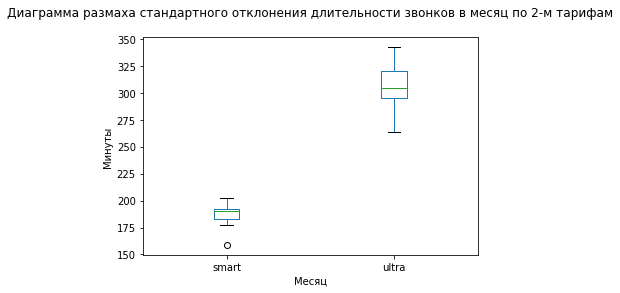

In [59]:
(revenue
 .pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='std')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха стандартного отклонения длительности звонков в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Минуты')

plt.show()

**Промежуточный вывод**

Распределение стандартного отклонения длительности разговоров абонентов тарифа Smart приближено к нормальному распределению. Стандратное оклонение длительности разговоров абонентов тарифа Ultra намного выше, чем у абонентов Smart. Пользователи тарифа Ultra не стабильны в использовании тарифа. 

In [60]:
# Дисперсия длительности звонков

revenue.pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='var').T.describe()

tariff,smart,ultra
count,12.000,12.000
mean,35034.728,93835.212
std,4022.882,14111.068
min,25239.387,69343.733
25%,33593.980,87088.868
50%,36083.657,92676.551
75%,36897.682,102601.600
max,40852.756,117100.799


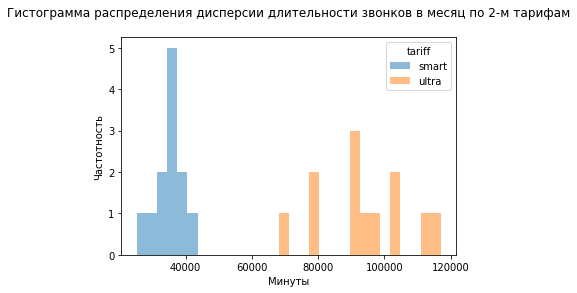

In [61]:
(revenue
 .pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='var')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения дисперсии длительности звонков в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')

plt.show()

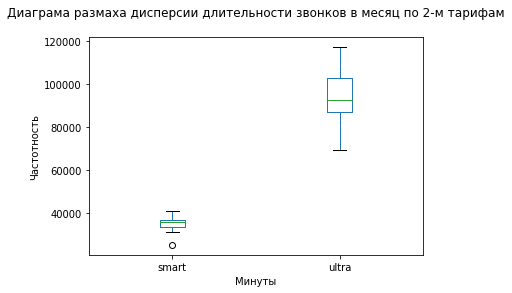

In [62]:
(revenue
 .pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='var')
 .T
 .plot(kind='box')
)
plt.title('Диаграма размаха дисперсии длительности звонков в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')

plt.show()

**Промежуточный вывод**

Распределение дисперсии длительности звонков приближено к нормальному распределению. Дисперсия длительности звонков абонентов тарифа Ultra намного больше, чем дисперсия длительности разговоров у абонентов Smart. 

**Анализ количества сообщений**

In [63]:
revenue.pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='mean').T.describe()

tariff,smart,ultra
count,12.000,12.000
mean,36.263,55.170
std,6.230,12.043
min,20.000,32.938
25%,35.786,46.978
50%,38.869,55.606
75%,39.117,64.011
max,42.265,72.009


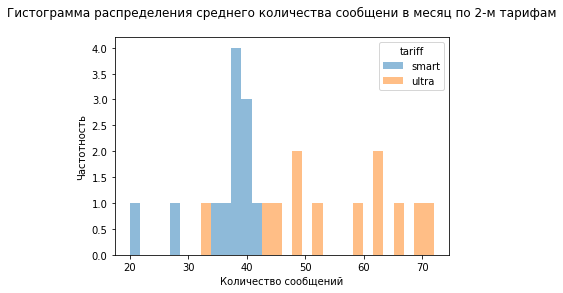

In [92]:
# Анализ среднего количества сообщений

(revenue
 .pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='mean')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения среднего количества сообщени в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Количество сообщений')
plt.ylabel('Частотность')

plt.show()


# **Анализ количества сообщений без группировки (дополнение)**

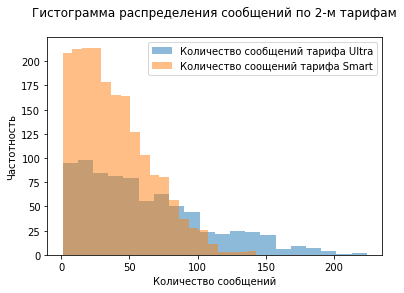

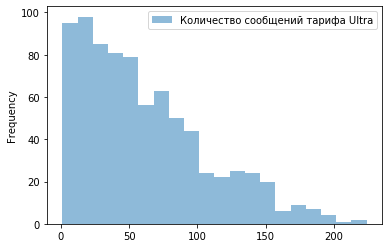

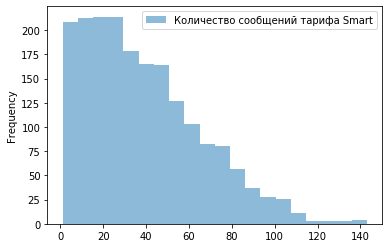

,mean,median,var,std
,messages_count,messages_count,messages_count,messages_count
tariff,,,,
smart,38.716,34.000,717.594,26.788
ultra,61.161,51.000,2109.659,45.931


In [93]:

ax = revenue[revenue['tariff'] == 'ultra'].plot(kind='hist', y='messages_count', label='Количество сообщений тарифа Ultra', alpha=0.5, bins=20)
revenue[revenue['tariff'] == 'smart'].plot(kind='hist', y='messages_count', label='Количество соощений тарифа Smart', ax=ax, alpha=0.5, bins=20)

plt.title('Гистограмма распределения сообщений по 2-м тарифам'+ "\n")
plt.xlabel('Количество сообщений')
plt.ylabel('Частотность')


revenue[revenue['tariff'] == 'ultra'].plot(kind='hist', y='messages_count', label='Количество сообщений тарифа Ultra', alpha=0.5, bins=20)
revenue[revenue['tariff'] == 'smart'].plot(kind='hist', y='messages_count', label='Количество сообщений тарифа Smart', alpha=0.5, bins=20)

plt.show()

display(revenue.pivot_table(index='tariff', values ='messages_count', aggfunc = ['mean', 'median', 'var', 'std']))

**Вывод по полученным данным**
Среднее количество отправленных сообщений по тарифу Ультра больше, чем по тарифу Смарт. 

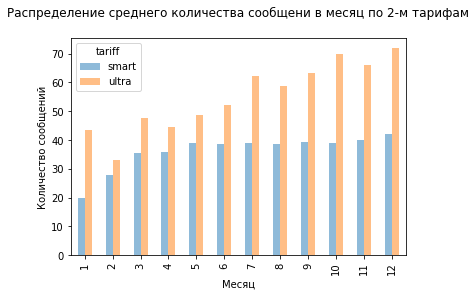

In [65]:
(revenue
 .pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='mean')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Распределение среднего количества сообщени в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Количество сообщений')

plt.show()

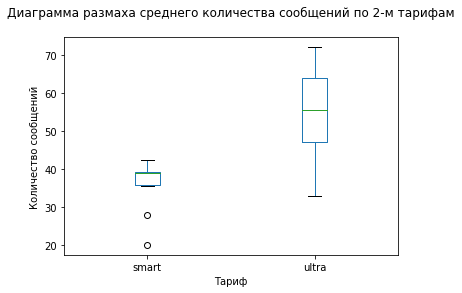

In [66]:
(revenue
 .pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='mean')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха среднего количества сообщений по 2-м тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Количество сообщений')

plt.show()

**Промежуточный вывод**

В среднем количество сообщений пользователи тарифа Ultra отправляют больше - почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифак растет. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную полодительную динамику.


In [67]:
revenue.pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='std').T.describe()

tariff,smart,ultra
count,12.000,12.000
mean,25.126,41.573
std,3.621,7.559
min,15.879,26.709
25%,24.645,39.000
50%,26.588,43.831
75%,27.071,46.961
max,28.852,49.261


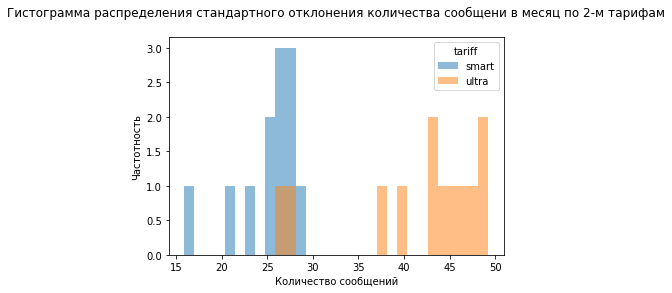

In [68]:
# Анализ стандартного отклонения количества сообщений

(revenue
 .pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='std')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения стандартного отклонения количества сообщени в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Количество сообщений')
plt.ylabel('Частотность')

plt.show()

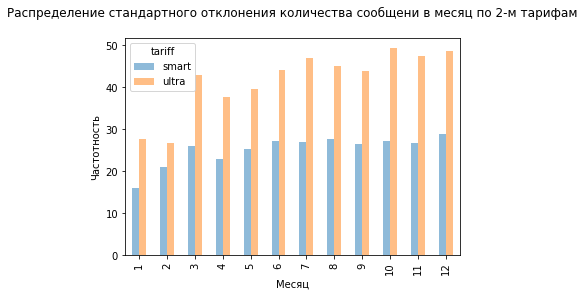

In [69]:
(revenue
 .pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='std')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Распределение стандартного отклонения количества сообщени в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Частотность')

plt.show()

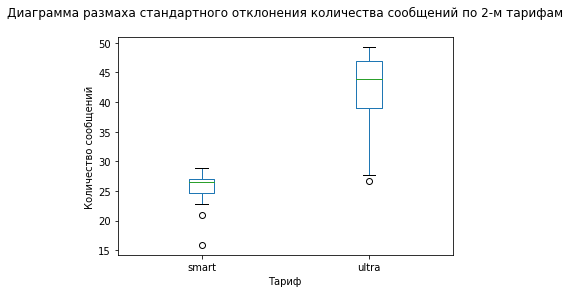

In [70]:
(revenue
 .pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='std')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха стандартного отклонения количества сообщений по 2-м тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Количество сообщений')

plt.show()

**Промежуточные выводы**

Распределение стандартного отклонения количества сообщений далеко от нормального распределения. Явно видно разделение на несколько групп - по типу тарифа. Стандартное отклонение больше у пользователей тарифного плана Ultra - это связано с тем, что пользователи этого тарифного плана проявляют довольно разную активность.

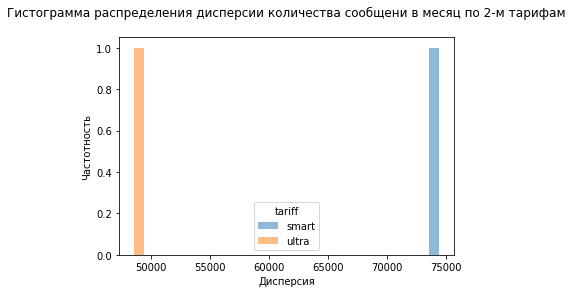

In [71]:
# Анализ дисперсии количества сообщений
(revenue
 .pivot_table(index='tariff', values='messages_count', aggfunc='sum')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения дисперсии количества сообщени в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Дисперсия')
plt.ylabel('Частотность')

plt.show()

**Промежуточные выводы**

Дисперсия количества отправленных сообщений в разных тарифных планах не типична для нормального распределения.

**Анализ объема интернет-трафика**

In [72]:
revenue.pivot_table(index='tariff', columns='month', values='gb_sum_internet', aggfunc='mean').T.describe()

tariff,smart,ultra
count,12.000,12.000
mean,15.230,18.519
std,2.643,2.791
min,8.735,13.091
25%,14.846,17.527
50%,15.962,19.574
75%,16.869,20.047
max,18.234,21.942


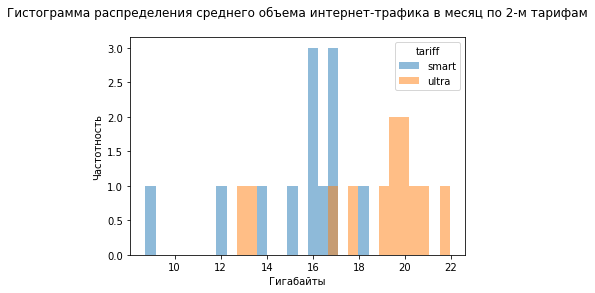

In [73]:
# Анализ среднего объема интернет-трафика

(revenue
 .pivot_table(index='tariff', columns='month', values='gb_sum_internet', aggfunc='mean')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения среднего объема интернет-трафика в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Гигабайты')
plt.ylabel('Частотность')

plt.show()

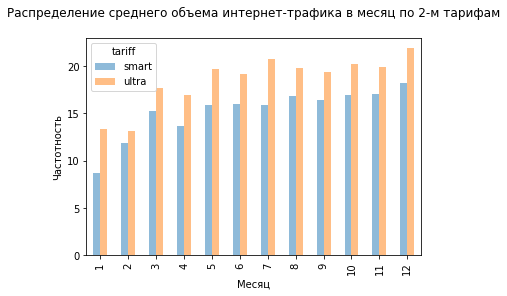

In [74]:
(revenue
 .pivot_table(index='tariff', columns='month', values='gb_sum_internet', aggfunc='mean')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Распределение среднего объема интернет-трафика в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Частотность')

plt.show()

# **Анализ среднего объема интернет-трафика** (дополнение)

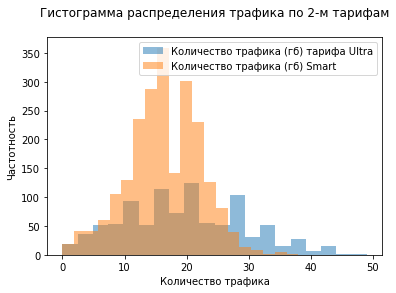

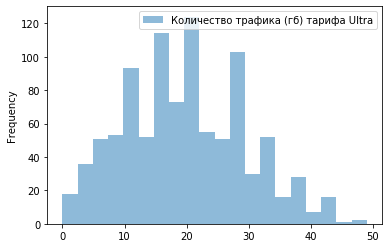

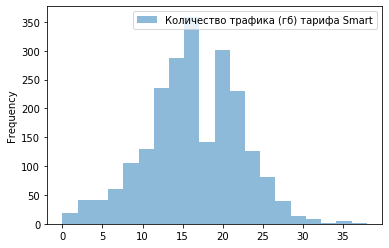

,mean,median,var,std
,gb_sum_internet,gb_sum_internet,gb_sum_internet,gb_sum_internet
tariff,,,,
smart,16.367,17.000,33.055,5.749
ultra,19.726,19.000,94.380,9.715


In [94]:
ax = revenue[revenue['tariff'] == 'ultra'].plot(kind='hist', y='gb_sum_internet', label='Количество трафика (гб) тарифа Ultra', alpha=0.5, bins=20)
revenue[revenue['tariff'] == 'smart'].plot(kind='hist', y='gb_sum_internet', label='Количество трафика (гб) Smart', ax=ax, alpha=0.5, bins=20)

plt.title('Гистограмма распределения трафика по 2-м тарифам'+ "\n")
plt.xlabel('Количество трафика')
plt.ylabel('Частотность')


revenue[revenue['tariff'] == 'ultra'].plot(kind='hist', y='gb_sum_internet', label='Количество трафика (гб) тарифа Ultra', alpha=0.5, bins=20)
revenue[revenue['tariff'] == 'smart'].plot(kind='hist', y='gb_sum_internet', label='Количество трафика (гб) тарифа Smart', alpha=0.5, bins=20)

plt.show()

display(revenue.pivot_table(index='tariff', values ='gb_sum_internet', aggfunc = ['mean', 'median', 'var', 'std']))

Вывод: Гистограммы распределения для обоих тарифных планов нетипичны. В среднем, пользователи тарифа Ультра используют на 2,5 Гб больше, чем пользователи тарифа Смарт.

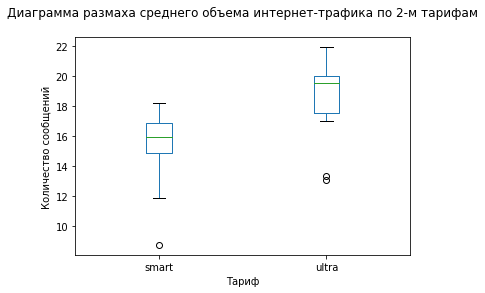

In [75]:
(revenue
 .pivot_table(index='tariff', columns='month', values='gb_sum_internet', aggfunc='mean')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха среднего объема интернет-трафика по 2-м тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Количество сообщений')

plt.show()

**Промежуточные выводы**

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тырифа Smart тратят 15-17 Гб, а абоненты тарифного плана Ultra - 19-20 ГБ. Также распределение среднего значения объема-трафика тарифных планов Ultra и Smart не типично для нормального распределения. 

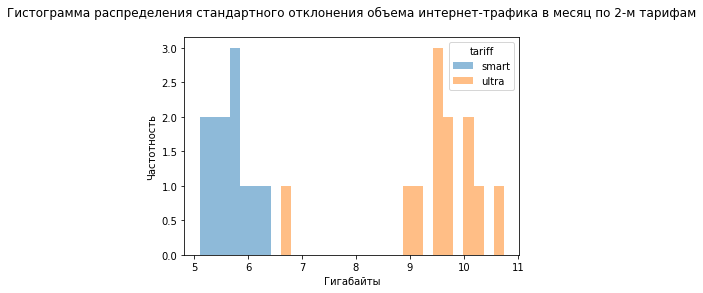

In [76]:
# Анализ стандартного отклонения объема интернет-трафика

(revenue
 .pivot_table(index='tariff', columns='month', values='gb_sum_internet', aggfunc='std')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения стандартного отклонения объема интернет-трафика в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Гигабайты')
plt.ylabel('Частотность')

plt.show()

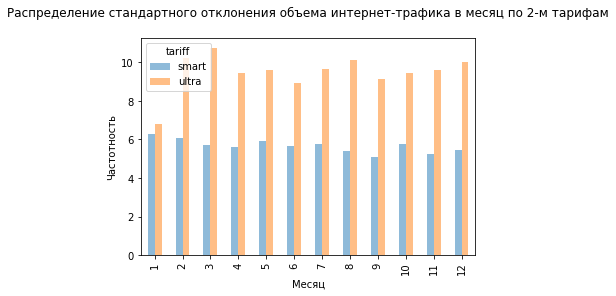

In [77]:
# Анализ стандартного отклонения объема интернет-трафика

(revenue
 .pivot_table(index='tariff', columns='month', values='gb_sum_internet', aggfunc='std')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Распределение стандартного отклонения объема интернет-трафика в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Частотность')

plt.show()

**Промежуточный вывод**

Показатели объема трафика тарифа Smart менее рассеяны вокруг среднего значения, к тому же среднее отклонение интернет-трафика постепенно уменьшается в течение года, чем нельзя сказать о привычках пользователей тарифного плана Ultra.


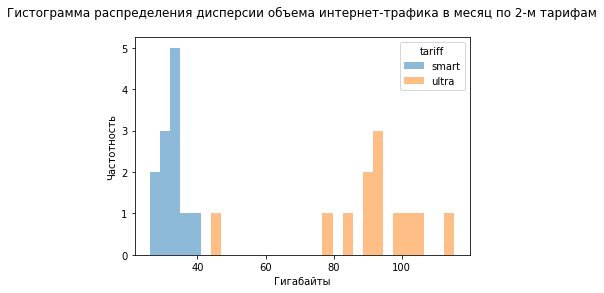

In [78]:
# Анализ дисперсии объема интернет-трафика

(revenue
 .pivot_table(index='tariff', columns='month', values='gb_sum_internet', aggfunc='var')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения дисперсии объема интернет-трафика в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Гигабайты')
plt.ylabel('Частотность')

plt.show()

**Промежуточный вывод**

Дисперсия интернет-трафика тарифа Smart более приближена к нормальному распределению, чем дисперсия тарифа Ultra.

## Исследовательский анализ выручки

In [79]:
mean_revenue_per_user = revenue.pivot_table(index='user_id', values='monthly_revenue', aggfunc='mean').reset_index()
mean_revenue_per_user.columns = ['user_id', 'monthly_revenue_per_user']
mean_revenue_per_user.head()

,user_id,monthly_revenue_per_user
0,1000,1950.000
1,1001,950.000
2,1002,1035.714
3,1003,1950.000
4,1004,1950.000


In [80]:
revenue = revenue.merge(df_users[['user_id', 'city']], on='user_id', how='left')

In [81]:
df_users = df_users.merge(mean_revenue_per_user, on='user_id', how='left')

In [82]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_stop,month_start,year_stop,year_start,day_duration_of_use,monthly_revenue_per_user
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,nan,5,nan,2018,NaT,1950.000
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,nan,11,nan,2018,NaT,950.000
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,nan,6,nan,2018,NaT,1035.714
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,nan,8,nan,2018,NaT,1950.000
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,nan,5,nan,2018,NaT,1950.000


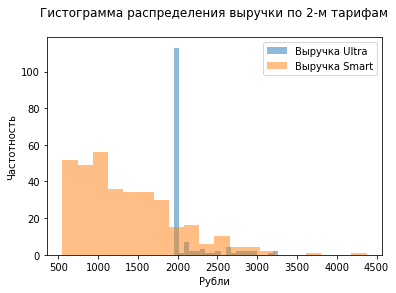

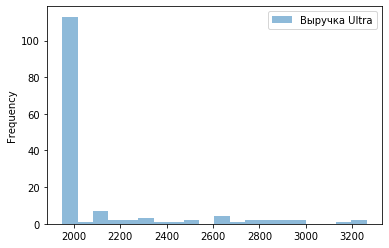

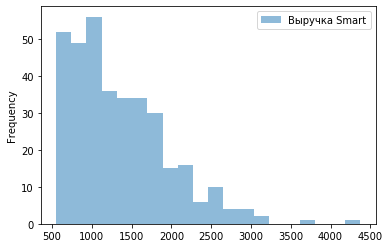

In [83]:
ax = df_users[df_users['tariff'] == 'ultra'].plot(kind='hist', y='monthly_revenue_per_user', label='Выручка Ultra', alpha=0.5, bins=20)
df_users[df_users['tariff'] == 'smart'].plot(kind='hist', y='monthly_revenue_per_user', label='Выручка Smart', ax=ax, alpha=0.5, bins=20)

plt.title('Гистограмма распределения выручки по 2-м тарифам'+ "\n")
plt.xlabel('Рубли')
plt.ylabel('Частотность')


df_users[df_users['tariff'] == 'ultra'].plot(kind='hist', y='monthly_revenue_per_user', label='Выручка Ultra', alpha=0.5, bins=20)
df_users[df_users['tariff'] == 'smart'].plot(kind='hist', y='monthly_revenue_per_user', label='Выручка Smart', alpha=0.5, bins=20)

plt.show()

In [84]:
df_users[df_users['tariff'] == 'ultra']['monthly_revenue_per_user'].describe()

count    148.000
mean    2087.417
std      300.847
min     1950.000
25%     1950.000
50%     1950.000
75%     1990.625
max     3262.500
Name: monthly_revenue_per_user, dtype: float64

In [85]:
df_users[df_users['tariff'] == 'ultra']['monthly_revenue_per_user'].sum()

308937.78138528136

In [86]:
df_users[df_users['tariff'] == 'smart']['monthly_revenue_per_user'].sum()

471416.8958152958

In [87]:
df_users[df_users['tariff'] == 'smart']['monthly_revenue_per_user'].describe()

count    350.000
mean    1346.905
std      614.745
min      550.000
25%      892.839
50%     1203.905
75%     1705.750
max     4375.333
Name: monthly_revenue_per_user, dtype: float64

In [88]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_stop,month_start,year_stop,year_start,day_duration_of_use,monthly_revenue_per_user
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,nan,5,nan,2018,NaT,1950.000
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,nan,11,nan,2018,NaT,950.000
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,nan,6,nan,2018,NaT,1035.714
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,nan,8,nan,2018,NaT,1950.000
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,nan,5,nan,2018,NaT,1950.000


**Промежуточные выводы**

В среднем пользователи тарифа Ultra чаще всего не выходят за рамки абонентской платы - в 1950 рублей. Абоненты Smart 550 рублей не редко превышают лимиты, которые установлены в рамках абонентской платы. Именно у пользователей тарифа Smart отмечена максимальная среднеежемесячная выручка – 4375 рублей.

## Проверка гипотез

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Н0 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» **равны**, т.е. средние значения равны.

Н1 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» **не равны**, т.е. средние значения не равны.

Для проверки гипотезы будет использоваться критерий p-value. 

In [89]:
#проверим раверство дисперсий выборок через тест Левена
sample_1 = revenue[revenue['tariff'] == 'ultra']['monthly_revenue'] 
sample_2 = revenue[revenue['tariff'] == 'smart']['monthly_revenue'] 
p_levene = st.levene(sample_1, sample_2).pvalue
alpha = 0.05
if p_levene < alpha:
    print('equal_var = False')
else:
    print('equal_var = True')
alpha = 0.05


results = st.ttest_ind( sample_1, sample_2, equal_var = False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

equal_var = False
p-значение:  2.2071398635388917e-234
Принимаем альтернативную гипотезу


p-значение достаточно мало, что дает основание отвергнуть предположение об отсутствии различий между выручками у разных тарифных планов, т.е. маловероятна случайность результатов теста гипотезы.

Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Н0 - средняя выручка пользователей из Москвы **не отличается** от выручки пользователей из других регионов, т.е. средние значения равны.

Н1 - средняя выручка пользователей из Москвы **отличается** от выручки пользователей из других регионов, т.е. средние значения не равны.

Для проверки гипотезы будет использоваться критерий p-value. 

In [90]:
#проверим раверство дисперсий выборок через тест Левена
sample_1 = revenue[revenue['city'] == 'Москва']['monthly_revenue'] 
sample_2 = revenue[revenue['city'] != 'Москва']['monthly_revenue'] 
p_levene = st.levene(sample_1, sample_2).pvalue
alpha = 0.05
if p_levene < alpha:
    print('equal_var = False')
else:
    print('equal_var = True')

results = st.ttest_ind( sample_2, sample_1, equal_var = False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

equal_var = False
p-значение:  0.5612228736965572
Опровергнуть нулевую гипотезу нельзя


Полученное значение p-value говорит о том, что средняя выручка пользователей из Москвы и из других регионов отличается, но с вероятностью в почти 56% такое различие можно получить случайно. Это слишком высокая вероятность для того, чтобы делать выводы о значимом различии между средними значениями выручки.


# Общий вывод по проекту

Активность пользователей тарифных планах отличается друг от друга, как позакал анализ распределений средних значений и вариативности предоставляемых услуг. 

Пользователи тарифа Ultra ведут траны хаотично, четкой тенденции по месяцам не прослеживается. Тем не менее, в среднем большиснтво клиентов укладываются в абонентскую планту - менее четверти клиентов доплачивают за превышение лимитов. 

Чаще всего пользователи превышали лимиты по интернет-трафику. Имеено этим обусловлена бОльший процент выручки у пользователей тарифа Smart. К тому же, именно у абонента этого тарифного плана отмечена максимальная выручка в выборке. 

**Таким образом, для оператора будет выгоднее тариф Smart с сохранением текущих лимитов по абонентской плате.**

